In [37]:
import numpy as np
import numpy.typing as npt

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# https://scikit-learn.org/stable/modules/cross_validation.html#stratification
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample

from mlxtend.plotting import plot_decision_regions

#from library.kernel_svm import SVM_SGA

In [16]:
df = pd.read_csv("dataset/parkinsons.csv")
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
174,117.004,144.466,99.923,0.00353,0.000030,0.00176,0.00218,0.00528,0.01657,0.145,...,0.01318,0.02643,0.00590,25.445,0.387482,0.756482,-6.012559,0.229298,1.872946,0.163118
20,153.848,165.738,65.782,0.00840,0.000050,0.00428,0.00450,0.01285,0.03810,0.328,...,0.04055,0.05000,0.03871,17.536,0.660125,0.704087,-4.095442,0.262564,2.739710,0.365391
111,208.519,220.315,199.020,0.00609,0.000030,0.00368,0.00339,0.01105,0.01761,0.155,...,0.01307,0.02855,0.00830,22.407,0.338097,0.712466,-6.471427,0.184378,2.502336,0.136390
109,193.030,208.900,80.297,0.00766,0.000040,0.00450,0.00389,0.01351,0.03044,0.275,...,0.02084,0.05312,0.00947,21.934,0.497554,0.740539,-5.845099,0.278679,2.608749,0.185668
55,109.860,126.358,104.437,0.00874,0.000080,0.00398,0.00539,0.01193,0.03209,0.307,...,0.02454,0.05368,0.01180,20.767,0.558586,0.811843,-4.333543,0.221727,2.014606,0.344834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,113.166,130.270,100.673,0.00502,0.000040,0.00257,0.00312,0.00772,0.05279,0.476,...,0.04134,0.08689,0.03690,16.747,0.625362,0.708617,-4.654894,0.304107,2.672362,0.274387
68,143.533,162.215,65.809,0.01101,0.000080,0.00647,0.00467,0.01941,0.05384,0.478,...,0.03392,0.09455,0.04882,20.338,0.513237,0.731444,-5.869750,0.151814,2.118496,0.185580
132,119.056,125.213,86.795,0.00346,0.000030,0.00169,0.00170,0.00508,0.01201,0.106,...,0.00915,0.01898,0.00903,23.389,0.470972,0.721308,-5.436135,0.254909,2.516320,0.232209
33,202.266,211.604,197.079,0.00180,0.000009,0.00093,0.00107,0.00278,0.00954,0.085,...,0.00719,0.01407,0.00072,32.684,0.368535,0.742133,-7.695734,0.178540,1.544609,0.056141


In [35]:
df["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

In [38]:
# up-sampling minority class
df_majority = df[df.status == 1]
df_minority = df[df.status == 0]

df_minority_upsampled = resample(
	df_minority,
	replace=True,
	n_samples=147, # match majority class
	random_state=42
)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

df_upsampled["status"].value_counts()

1    147
0    147
Name: status, dtype: int64

In [48]:
X = df_upsampled.drop(["status", "name"], axis=1)
y = df_upsampled["status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, shuffle = True, random_state = 42, stratify=y)

X_train

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
124,156.239,195.107,79.820,0.00694,0.00004,0.00403,0.00395,0.01209,0.02343,0.224,...,0.01720,0.03867,0.02020,19.196,0.618663,0.728421,-5.944191,0.143359,1.929715,0.181988
53,129.336,139.867,118.604,0.00490,0.00004,0.00165,0.00183,0.00495,0.02498,0.228,...,0.01947,0.04188,0.00484,25.429,0.420383,0.785714,-6.836811,0.269866,2.223719,0.147491
111,208.519,220.315,199.020,0.00609,0.00003,0.00368,0.00339,0.01105,0.01761,0.155,...,0.01307,0.02855,0.00830,22.407,0.338097,0.712466,-6.471427,0.184378,2.502336,0.136390
36,177.876,192.921,168.013,0.00411,0.00002,0.00233,0.00241,0.00700,0.02126,0.189,...,0.01612,0.03463,0.00586,23.216,0.360148,0.778834,-6.149653,0.218037,2.477082,0.165827
91,151.955,163.335,147.226,0.00419,0.00003,0.00224,0.00227,0.00672,0.07959,0.772,...,0.05690,0.13262,0.01658,19.664,0.501037,0.714360,-6.411497,0.207156,2.344876,0.134120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,202.805,231.508,86.232,0.00370,0.00002,0.00189,0.00211,0.00568,0.01997,0.180,...,0.01506,0.03350,0.02010,18.687,0.536102,0.632631,-5.898673,0.213353,2.470746,0.189032
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
108,151.989,157.339,132.857,0.00174,0.00001,0.00075,0.00096,0.00225,0.01024,0.093,...,0.00993,0.01364,0.00238,29.928,0.311369,0.676066,-6.739151,0.160686,2.296873,0.115130
31,199.228,209.512,192.091,0.00241,0.00001,0.00134,0.00138,0.00402,0.01015,0.089,...,0.00762,0.01513,0.00167,30.940,0.432439,0.742055,-7.682587,0.173319,2.103106,0.068501


In [11]:
def plot_data(X: npt.NDArray, y: npt.NDArray):
	# project points on the 2 first principal components
	scaler = StandardScaler()
	X_scaled = scaler.fit_transform(X)

	pca = PCA(n_components=2)
	X_pca = pca.fit_transform(X_scaled)

	fig, ax = plt.subplots(1, figsize = (12, 7))

	options = {
		0: {
			"color": "royalblue",
			"label": "Healty",
			"marker": "o",
			"alpha": 0.7
		},
		1: {
			"color": "orange",
			"label": "Parkinson",
			"marker": "o",
			"alpha": 0.7
		}
	}

	for label in np.unique(y.tolist()):
		label_indices = np.where(y.tolist() == label)[0]

		# plot points (that are not support vectors)
		ax.scatter(
			X_pca[:,0][label_indices], 
			X_pca[:,1][label_indices], 
			c=options[label]["color"], 
			label=options[label]["label"], 
			alpha=options[label]["alpha"]
		)

	ax.legend(loc="best")
	ax.set_xlabel("Principal Component 1")
	ax.set_ylabel("Principal Component 2")

	plt.show()

In [28]:
def plot_margins(X: npt.NDArray, y: npt.NDArray, support_vectors: npt.NDArray, clf):
	fig, ax = plt.subplots(1, figsize = (12, 7))

	options = {
		0: {
			"color": "royalblue",
			"label": "Healty",
			"marker": "o",
			"alpha": 1.0
		},
		1: {
			"color": "orange",
			"label": "Parkinson",
			"marker": "o",
			"alpha": 1.0
		}
	}

	for label in np.unique(y.tolist()):
		label_indices = np.where(y.tolist() == label)[0]

		# plot points (that are not support vectors)
		ax.scatter(
			X[:,0][label_indices], 
			X[:,1][label_indices], 
			c=options[label]["color"], 
			s=30,
			label=options[label]["label"], 
			alpha=options[label]["alpha"]
		)

	# plot support vectors
	ax.scatter(
		support_vectors[:,0], 
		support_vectors[:,1], 
		#c="grey",
		#marker="s",
		s=100,
		linewidth=1,
		facecolors=None,
		edgecolors="k",
		#alpha=0.3,
		label="support vectors"
	)

	# create the meshgrid for the contour decision function
	xx, yy = np.meshgrid(
		np.arange(X[:,0].min() - 1, X[:,0].max() + 1, step=0.1),
		np.arange(X[:,1].min() - 1, X[:,1].max() + 1, step=0.1),
	)

	f = clf.decision_function(np.c_[np.ravel(xx), np.ravel(yy)])
	f = f.reshape(xx.shape)
	ax.contourf(xx, yy, f, alpha = 0.5, cmap=plt.cm.bone)

	#plot_decision_regions(X, y, clf)

	ax.legend(loc="best")
	ax.set_xlabel("principal component 1")
	ax.set_ylabel("principal component 2")

	plt.show()

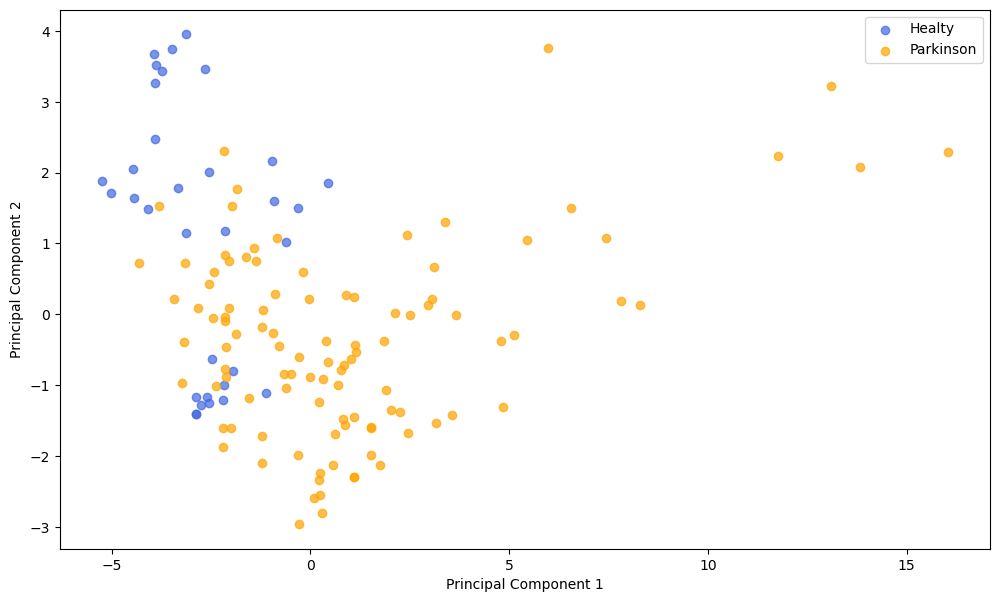

In [17]:
plot_data(X_train, y_train)

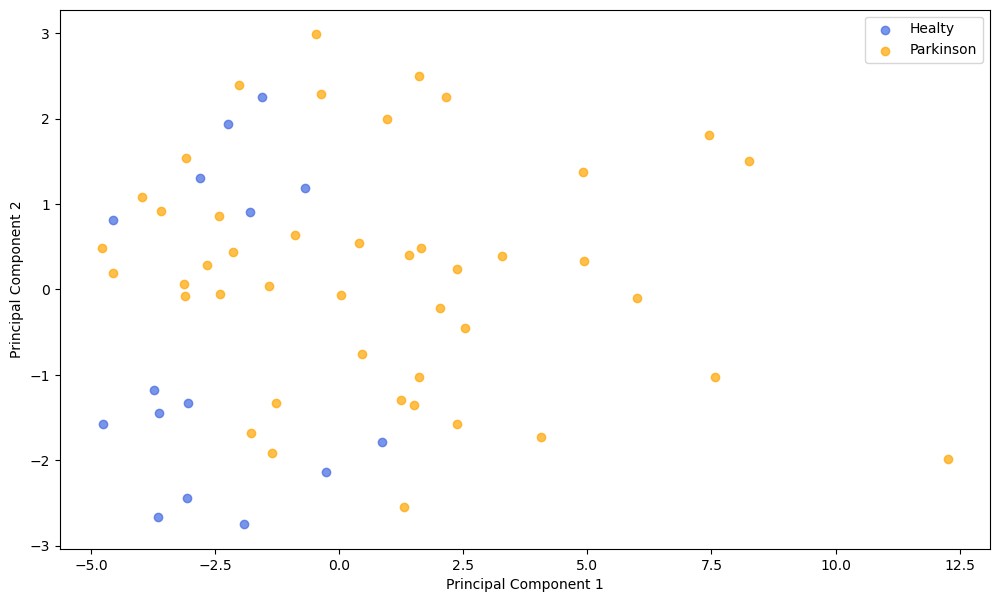

In [21]:
plot_data(X_test, y_test)

## Soft Margin SVM

In [49]:
linear_clf = SVC(kernel="linear")
linear_clf.fit(X_train, y_train)

test_score = linear_clf.score(X_test, y_test)

print("----- Linear SVM -----")
print(f"score on testing set: {test_score}")

----- Linear SVM -----
score on testing set: 0.7528089887640449


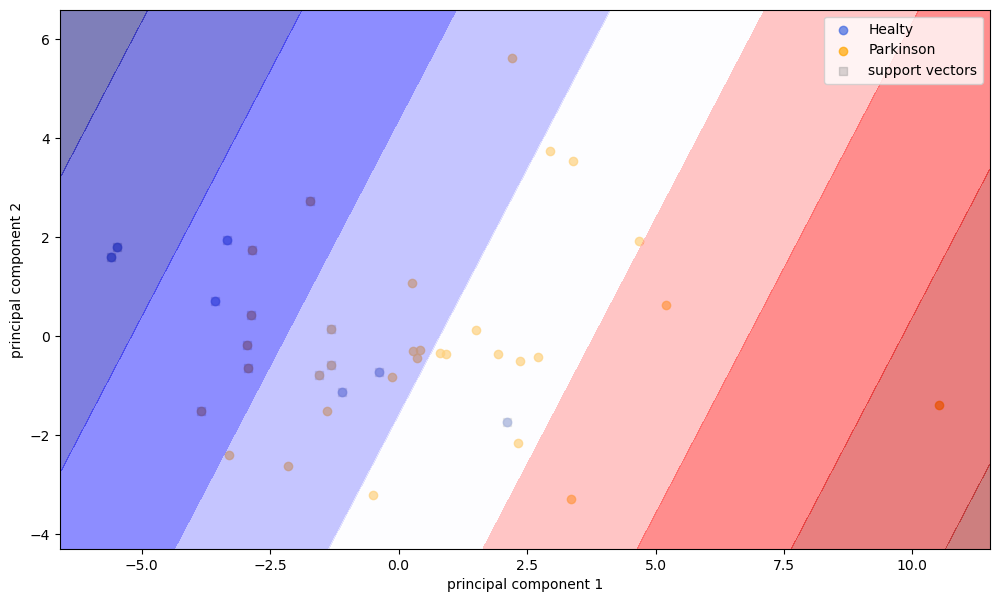

In [11]:
scaler = StandardScaler()
pca = PCA(n_components=2)

X_test_scaled = scaler.fit_transform(X_test)
X_test_pca = pca.fit_transform(X_test_scaled)

linear_clf.fit(X_test_pca, y_test)

plot_margins(X_test_pca, y_test, linear_clf.support_vectors_, linear_clf)

In [12]:
y_pred = linear_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cm), annot=True)

/Users/mathieu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


ValueError: X has 22 features, but SVC is expecting 2 features as input.

## Hard Margin SVM

In [50]:
kf = StratifiedKFold(n_splits=5)

hard_margin_params = {
	"C": [7.0, 8.0, 9.0, 10.0, 11.0, 11.5, 12.0, 12.5, 13.0, 14.0, 15.0]
}

gs_hard = GridSearchCV(
	estimator=SVC(kernel="linear"), 
	param_grid=hard_margin_params,
	cv=kf,
	refit=True,
	return_train_score=True
)

gs_hard.fit(X_train, y_train)
val_score = np.round(gs_hard.best_score_, 3)
test_score = np.round(gs_hard.score(X_test, y_test), 3)

print("----- Linear SVM with C Penalty -----")
print(f"score on validation set: {val_score}")
print(f"score on testing set: {test_score}")
print(f"best params: {gs_hard.best_params_}")

----- Linear SVM with C Penalty -----
score on validation set: 0.82
score on testing set: 0.742
best params: {'C': 11.5}


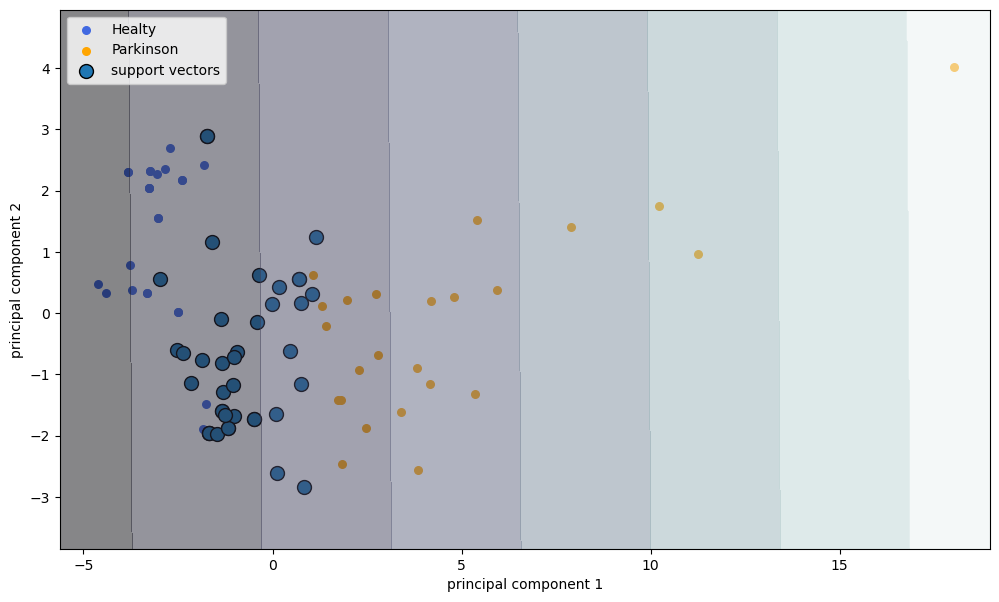

In [51]:
scaler = StandardScaler()
pca = PCA(n_components=2)

X_test_scaled = scaler.fit_transform(X_test)
X_test_pca = pca.fit_transform(X_test_scaled)

svm = SVC(kernel="linear", C=gs_hard.best_params_["C"])
clf = svm.fit(X_test_pca, y_test)

plot_margins(X_test_pca, y_test, svm.support_vectors_, clf)

<Axes: >

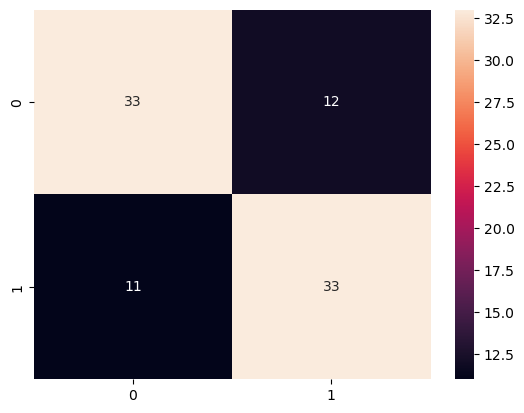

In [52]:
y_pred = gs_hard.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cm), annot=True)

## Kernel Trick

In [60]:
kf = StratifiedKFold(n_splits=5)

kernel_params = {
	"C": [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 11.5, 12.0, 12.5, 13.0, 14.0, 15.0],
	"gamma": [0.001, 0.0015, 0.002, 0.0025, 0.003, 0.005, 0.01, 0.02, 0.1]
}

gs_kernel = GridSearchCV(
	estimator=SVC(kernel="rbf"), 
	param_grid=kernel_params,
	cv=kf,
	refit=True,
	return_train_score=True
)

gs_kernel.fit(X_train, y_train)
val_score = np.round(gs_kernel.best_score_, 3)
test_score = np.round(gs_kernel.score(X_test, y_test), 3)

print("----- SVM with Kernel Trick -----")
print(f"score on validation set: {val_score}")
print(f"score on testing set: {test_score}")
print(f"best params: {gs_kernel.best_params_}")

----- SVM with Kernel Trick -----
score on validation set: 0.961
score on testing set: 0.888
best params: {'C': 5.0, 'gamma': 0.005}


Let's try our svm model on the testing set and plot the results on the 2 first principal components.

In [61]:
scaler = StandardScaler()
pca = PCA(n_components=2)

X_test_scaled = scaler.fit_transform(X_test)
X_test_pca = pca.fit_transform(X_test_scaled)

svm = SVC(kernel="rbf", C=gs_kernel.best_params_["C"], gamma=gs_kernel.best_params_["gamma"])
clf = svm.fit(X_test_pca, y_test)

svm.support_vectors_

array([[-1.82945725, -1.89394905],
       [-1.33214325, -1.60021514],
       [-1.74709787, -1.48758759],
       [-1.67520732, -1.95341422],
       [-1.67520732, -1.95341422],
       [ 1.15478978,  1.23405764],
       [-1.30018623, -1.28686189],
       [-1.61206905,  1.15872282],
       [-0.34975833,  0.62296132],
       [ 0.69401827,  0.55884881],
       [-1.19020325, -1.87305515],
       [-0.49806976, -1.73065823],
       [-1.81290708,  2.41713471],
       [ 0.69401827,  0.55884881],
       [-1.01266489, -1.6772462 ],
       [-1.33214325, -1.60021514],
       [ 0.0996099 , -1.6408077 ],
       [-1.72144748,  2.88233694],
       [-0.49806976, -1.73065823],
       [-1.67520732, -1.95341422],
       [-1.4696405 , -1.97018914],
       [-1.72144748,  2.88233694],
       [-1.19020325, -1.87305515],
       [-2.15370735, -1.13641677],
       [-1.3428894 , -0.80837637],
       [ 1.06257518,  0.614661  ],
       [ 0.83591135, -2.84819653],
       [ 1.30637688,  0.11194149],
       [-0.40448934,

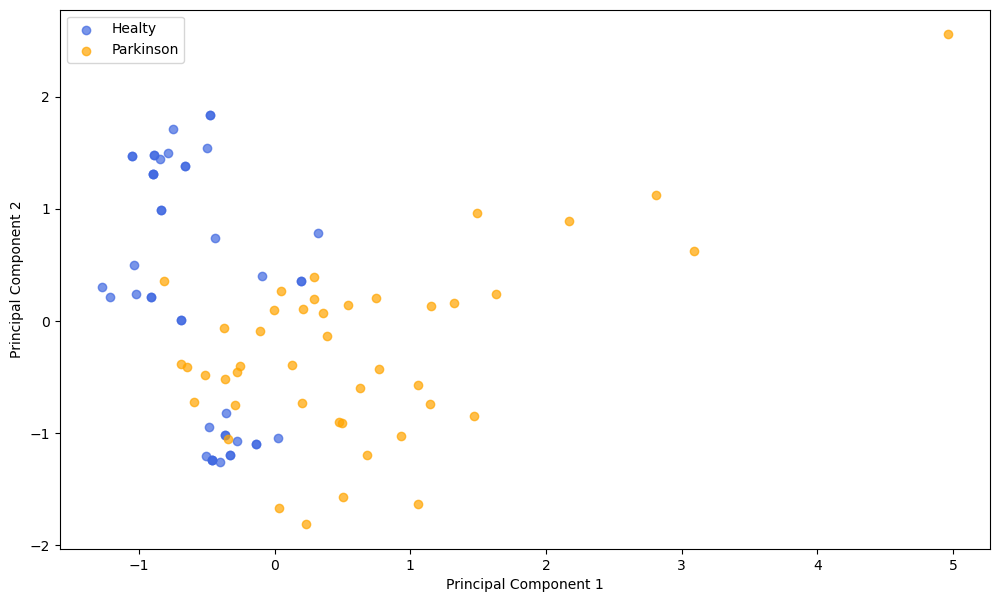

In [56]:
plot_data(X_test_pca, y_test)

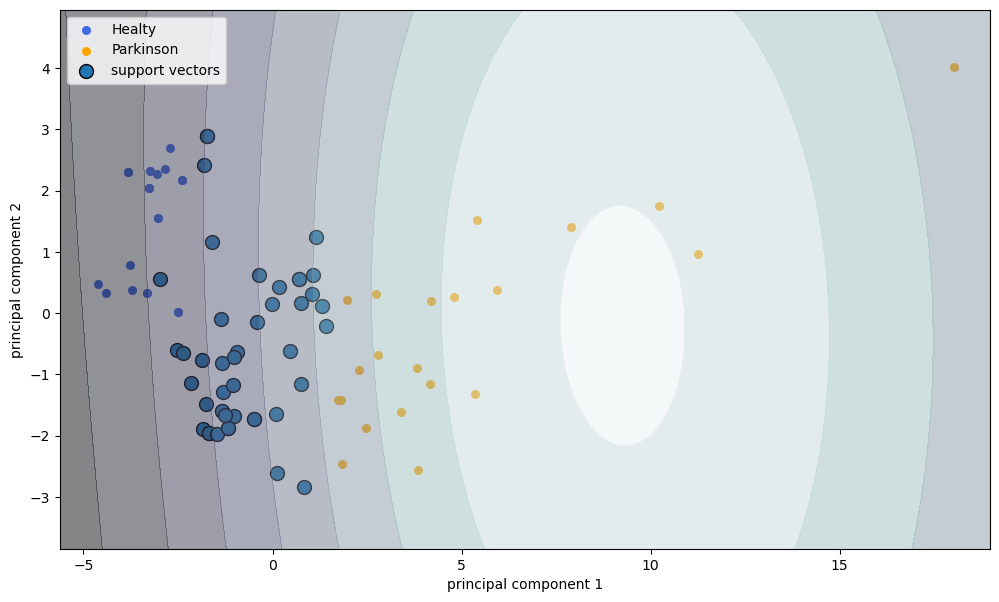

In [62]:
plot_margins(X_test_pca, y_test, svm.support_vectors_, clf)

<Axes: >

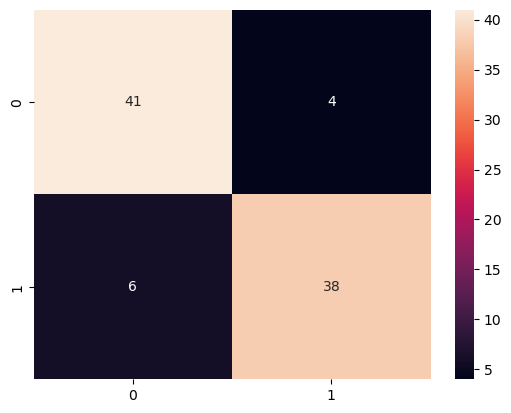

In [63]:
y_pred = gs_kernel.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cm), annot=True)

In [64]:
import numpy as np 
import numpy.typing as npt

from enum import Enum

class KernelType(Enum):
	LINEAR = "linear"
	RBF = "rbf"

class SVM_SGA:
	def __init__(self, kernel: str = "linear", C: float = 1.0, gamma: float = 1.0, learning_rate: float = 10e-3,  epochs: int = 10000) -> None:
		self.C = C
		self.gamma =gamma

		self.learning_rate = learning_rate
		self.epochs = epochs
		self.tol = 10e-6
		self.epsilon = 10e-8

		self.set_kernel(kernel)

	def linear_kernel(self, X_i, X_j):
		return np.dot(X_i.T, X_j)

	def rbf_kernel(self, X_i, X_j, gamma):
		return np.exp((- np.linalg.norm(X_i - X_j) ** 2) * gamma)

	def set_kernel(self, kernel: str):
		if kernel == KernelType.LINEAR.value:
			self.kernel = self.linear_kernel
		elif kernel == KernelType.RBF.value:
			self.kernel = self.rbf_kernel
		else:
			raise ValueError("Unsupported kernel.")

	def compute_kernel_matrix(self, X1, X2, gamma):
		n, p = X1.shape
		m, p = X2.shape

		K = np.zeros((n, m))

		for i in range(0, n):
			for j in range(0, m):
				K[i, j] = self.rbf_kernel(X1[i,:], X2[j,:], gamma)

		return K

	def fit(self, X, y):
		# n observations, p variables
		n, p = X.shape

		# add 1 at the end of each row
		X = np.hstack((X, np.ones((len(X), 1))))

		self.X = X 
		# ensure target class \in {-1, 1}
		self.y = np.where(y <= 0, -1, 1)

		# compute kernel matrix
		K = self.compute_kernel_matrix(X1=X, X2=X, gamma=self.gamma)

		# compute eta vector
		self.etas = np.zeros((n))

		for k in range(0, n):
			self.etas[k] = 1 / K[k, k]

		# initialize Lagrange multipliers
		self.alphas = np.zeros((n))
		self.bias = 0

		for t in range(0, self.epochs):
			current_alphas = self.alphas.copy()
			# update each alpha component (stochastic gradient ascent)
			for k in range(0, n):
				current_alphas[k] = current_alphas[k] + self.etas[k] * (1 - (self.y[k] * np.sum(current_alphas * self.y * K[:, k])))

				# ensure 0 <= alpha_k <= C
				if (current_alphas[k] < 0):
					current_alphas[k] = 0
				elif current_alphas[k] > self.C:
					current_alphas[k] = self.C

			# break if convergence
			if np.linalg.norm(current_alphas - self.alphas) <= self.tol:
				print(f"converged at loop {t}")
				break
			
			# update alphas
			self.alphas = current_alphas

		#self.compute_params(K)
		self.compute_support_vectors()

	def compute_params(self, K):
		self.b = self.y - np.sum(self.alphas * self.y * K, axis=0)
		self.w = np.sum(self.alphas * self.y * K, axis=0)

	def compute_support_vectors(self):
		support_vectors_idx = self.alphas > self.epsilon
		self.support_vectors = self.X[support_vectors_idx][:,:-1]
				
	def predict(self, X):
		K = self.compute_kernel_matrix(X1=self.X, X2=X, gamma=self.gamma)
		return np.sign(np.sum(self.alphas * self.y * K, axis=0) + self.b)

In [65]:
custom_svm = SVM_SGA(kernel="rbf", C=gs_kernel.best_params_["C"], gamma=gs_kernel.best_params_["gamma"])
custom_svm.fit(X_test_pca, y_test)
custom_svm.support_vectors

converged at loop 146


array([[-1.82945725, -1.89394905],
       [-1.33214325, -1.60021514],
       [-2.15370735, -1.13641677],
       [-2.39119907,  2.16628987],
       [-1.3428894 , -0.80837637],
       [-1.74709787, -1.48758759],
       [-1.67520732, -1.95341422],
       [-1.67520732, -1.95341422],
       [ 1.06257518,  0.614661  ],
       [ 0.83591135, -2.84819653],
       [ 1.30637688,  0.11194149],
       [ 1.15478978,  1.23405764],
       [-0.40448934, -0.14807007],
       [-1.25150448, -1.65836303],
       [ 0.74962846,  0.17007463],
       [ 1.04802767,  0.30355753],
       [-0.93626651, -0.63114416],
       [-1.30018623, -1.28686189],
       [-1.87024676, -0.75999749],
       [-1.61206905,  1.15872282],
       [-0.34975833,  0.62296132],
       [ 0.69401827,  0.55884881],
       [-1.19020325, -1.87305515],
       [-0.49806976, -1.73065823],
       [-1.81290708,  2.41713471],
       [ 0.69401827,  0.55884881],
       [-1.01266489, -1.6772462 ],
       [-1.33214325, -1.60021514],
       [ 0.0996099 ,

In [ ]:
plot_margins(X_test_pca, y_test, custom_svm.support_vectors, clf)